## Grouping activities

We can observe from the T-SNE, there are ~3/4 large groups of activities. After some observation, we can see that the activities that is  similar in terms of intensity  will be grouped into 1. Based on this observation, we will try to handle  the underrepresented data using this grouping technique.  

In [3]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv("./input/Train/train.csv")
test = pd.read_csv("./input/Test/test.csv")

print("shape of train: ", train.shape, "shape of test: ", test.shape)

shape of train:  (7767, 563) shape of test:  (3162, 563)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# First, we need to standardize the data to get better performance
features = train.columns.values.tolist()
features.remove('Activity')
features.remove('subject')

test_features = test.columns.values.tolist()
test_features.remove('Activity')
test_features.remove('subject')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

train_features, validation_features, train_labels, validation_labels = train_test_split(x, y, test_size=0.25, random_state=1300)

# Standardizing the features
sc = StandardScaler()
train_features = sc.fit_transform(train_features)
validation_features = sc.transform(validation_features)

targets = train['Activity'].unique()

train_labels = pd.DataFrame(train_labels, columns=['Activity'])
validation_labels = pd.DataFrame(validation_labels, columns=['Activity'])

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 50, n_iter = 2500)
tsne_results = tsne.fit_transform(train_features)

df_subset = pd.DataFrame(columns = ['tsne-2d-one','tsne-2d-two', 'Activities'])
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]
df_subset['Activities'] = train_labels

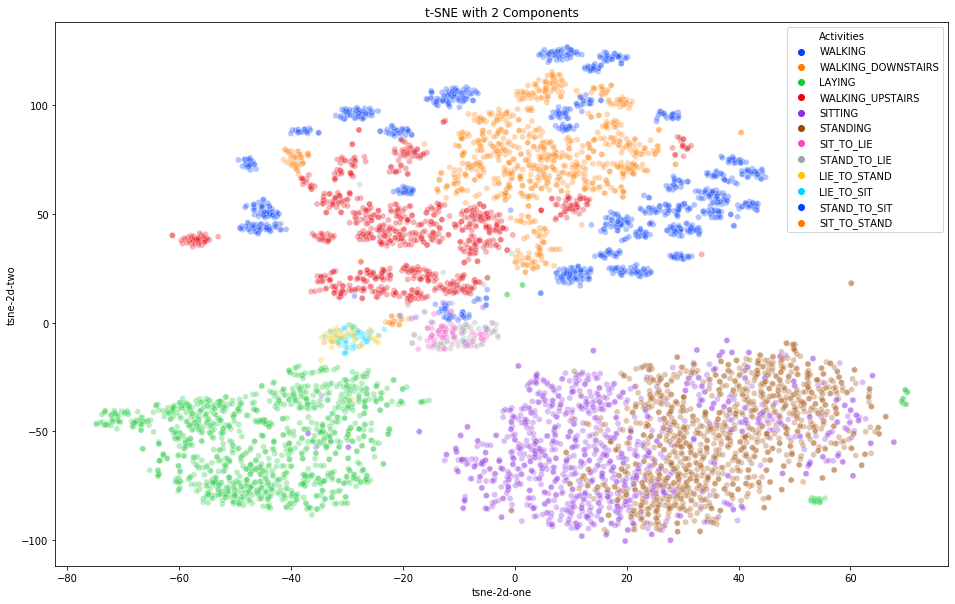

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 10))
plt.title('t-SNE with 2 Components')

sns.scatterplot(
    x = "tsne-2d-one", y = "tsne-2d-two",
    hue = "Activities",
    palette = "bright",
    data = df_subset,
    legend = "full",
    alpha = 0.3
)

plt.show()

In [24]:
group_1 = ["WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
group_2 = ["LAYING"]
group_3 = ["SITTING", "STANDING"]
grp = []

def getGroup(activity):
    if activity in  group_1:
        return 1
    elif activity in group_2:
        return 2
    elif activity in group_3:
        return 3
    return 4

train_modified = train.copy()
train_modified["Activity"] =train["Activity"].map(lambda x: getGroup(x))
train_modified.head(20)


,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,subject,Activity
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,1,3
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,1,3
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,1,3
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,1,3
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,1,3
5,0.038988,0.004109,-0.017340,-0.997438,-0.993485,-0.996692,-0.997522,-0.993494,-0.996916,-0.801982,...,-0.844224,0.082632,-0.143439,0.275041,-0.368224,-0.849927,0.184795,-0.035326,1,3
6,0.039897,-0.005324,-0.020457,-0.997024,-0.977313,-0.987782,-0.996898,-0.977450,-0.989391,-0.800606,...,-0.571126,-0.212754,-0.230622,0.014637,-0.189512,-0.852441,0.182142,-0.036203,1,3
7,0.039082,-0.016047,-0.030241,-0.996662,-0.976996,-0.986672,-0.996380,-0.977594,-0.989310,-0.800606,...,-0.432022,-0.020888,0.593996,-0.561871,0.467383,-0.851309,0.183751,-0.035176,1,3
8,0.039026,-0.007410,-0.027301,-0.997431,-0.973190,-0.988183,-0.997491,-0.971557,-0.990156,-0.800245,...,-0.579474,0.012954,0.080936,-0.234313,0.117797,-0.848270,0.188955,-0.030594,1,3
9,0.040354,0.004245,-0.017932,-0.994906,-0.981181,-0.990046,-0.995300,-0.982483,-0.990920,-0.799717,...,0.115919,-0.020590,-0.127730,-0.482871,-0.070670,-0.848592,0.190283,-0.027667,1,3


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# First, we need to standardize the data to get better performance
features = train.columns.values.tolist()
features.remove('Activity')
features.remove('subject')

test_features = test.columns.values.tolist()
test_features.remove('Activity')
test_features.remove('subject')

# Separating out the features
X = train_modified.loc[:, features].values

# Separating out the target
y = train_modified.loc[:,['Activity']].values

train_features, validation_features, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=1300)

# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(train_features)
X_validation = sc.transform(validation_features)

targets = train['Activity'].unique()

y_train = pd.DataFrame(y_train, columns=['Activity'])
y_validation = pd.DataFrame(y_validation, columns=['Activity'])




In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 50, n_iter = 2500)
tsne_results = tsne.fit_transform(X_train)

df_subset = pd.DataFrame(columns = ['tsne-2d-one','tsne-2d-two', 'Activities'])
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]
df_subset['Activities'] = y_train

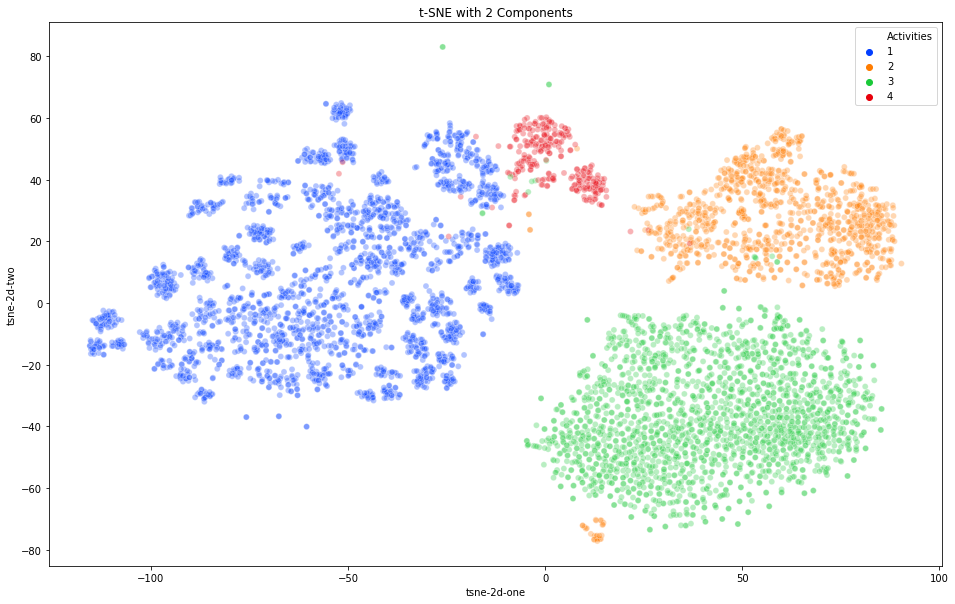

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 10))
plt.title('t-SNE with 2 Components')

sns.scatterplot(
    x = "tsne-2d-one", y = "tsne-2d-two",
    hue = "Activities",
    palette = "bright",
    data = df_subset,
    legend = "full",
    alpha = 0.3
)

plt.show()

In [46]:
#checking linear separability on the data using SVM
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelBinarizer

y_dense = LabelBinarizer().fit_transform(y)
svm = LinearSVC(random_state=0, multi_class="crammer_singer", max_iter = 100000, C=2**32)

svm.fit(X_train, y_train)
accuracy = svm.score(X_train, y_train)




C:\Users\daffa fathani a\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


testing on the validation data gives the accuracy of:  1.0


C:\Users\daffa fathani a\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [47]:
print("testing on the training data gives the accuracy of (C = 2^32): ", accuracy)

testing on the training data gives the accuracy of (C = 2^32):  1.0


### We can see from the result above that the data is now linearly separable as SVM can perfectly fit on the training data without misclassification

In [52]:
# since the data is linearly separable, we can use linear model such as Decision tree and logistic regression
# using decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


dt = DecisionTreeClassifier(random_state=0, max_depth=30) #only use maximum 100 important features
accuracy = cross_val_score(dt, X, y, cv = 10).mean()



In [40]:
print("accuracy of decision tree with 30 depth (10-fold cross validation): ", accuracy)

accuracy of decision tree with 30 depth (10-fold cross validation):  0.9930468760365667


In [56]:
# using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logistic_regressor = LogisticRegression(multi_class="multinomial", random_state=0, penalty="l2", max_iter=10000) 
#add l1 penalty to mitigate overfitting by limitting the complexity of the model

accuracy = cross_val_score(logistic_regressor, X, y.ravel(), cv = 10).mean()

In [57]:
print("accuracy of logistic regression (with 10 fold cross validation): ", accuracy)

accuracy of logistic regression (with 10 fold cross validation):  0.9969095384043836
